In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [ ]:
# Conteo de sentimientos
print(df["sentiment"].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
review = []
sentences = list(df["review"])
for sen in sentences:
    review.append(sen)

In [ ]:
import numpy as np

labels = df["sentiment"]
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [ ]:
# Parametros
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inicio de la clase del tokenizador
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generación de la palabra índice del diccionario
# para el entrenamiento de fantasmas

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generación y relleno de la secuencia de entrenamiento
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen = max_length, truncating = trunc_type)

# Generación y relleno de la secuencia de prueba
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen = max_length, truncating = trunc_type)

In [ ]:
# Construcción del modelo
import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Configuración de los parámetros de entrenamiento
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6743 - loss: 0.5652 - val_accuracy: 0.7882 - val_loss: 0.4443
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8246 - loss: 0.3912 - val_accuracy: 0.8013 - val_loss: 0.4230
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8591 - loss: 0.3289 - val_accuracy: 0.7953 - val_loss: 0.4551
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8872 - loss: 0.2732 - val_accuracy: 0.7828 - val_loss: 0.4851
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9099 - loss: 0.2263 - val_accuracy: 0.7777 - val_loss: 0.5574
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9315 - loss: 0.1799 - val_accuracy: 0.7714 - val_loss: 0.6575
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9482 - loss: 0.1381 - val_accuracy: 0.7642 - val_loss: 0.7834
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9620 - loss: 0.1073 -

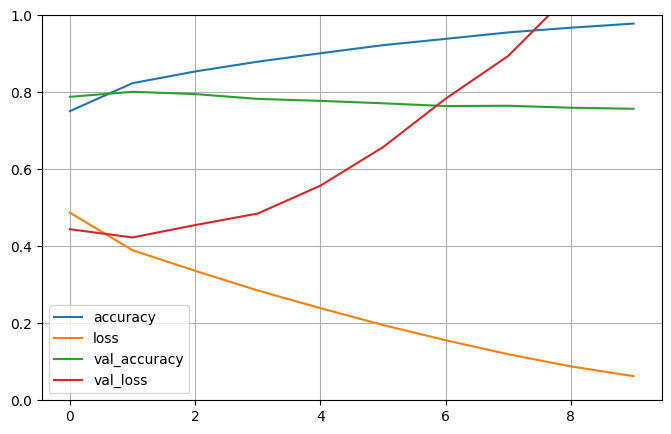

In [ ]:
# Entrenamiento del modelo
import matplotlib.pyplot as plt

history = model.fit(padded,
                    train_labels,
                    epochs=10,
                    validation_data=(test_padded, test_labels))

# Gráfico del historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model2 = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.25),
    keras.layers.LSTM(32),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


preguntas

In [ ]:
# Configuración de los parámetros de entrenamiento
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del modelo
import matplotlib.pyplot as plt

history2 = model2.fit(padded,
                    train_labels,
                    epochs=10,
                    validation_data=(test_padded, test_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 107ms/step - accuracy: 0.6780 - loss: 0.5879 - val_accuracy: 0.8077 - val_loss: 0.4279
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 152s 115ms/step - accuracy: 0.8055 - loss: 0.4378 - val_accuracy: 0.8105 - val_loss: 0.4074
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 108ms/step - accuracy: 0.8162 - loss: 0.4135 - val_accuracy: 0.8141 - val_loss: 0.4011
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 107ms/step - accuracy: 0.8265 - loss: 0.3933 - val_accuracy: 0.8231 - val_loss: 0.4011
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - accuracy: 0.8375 - loss: 0.3728 - val_accuracy: 0.8164 - val_loss: 0.3980
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 109ms/step - accuracy: 0.8402 - loss: 0.3662 - val_accuracy: 0.8229 - val_loss: 0.3962
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 108ms/step - accuracy: 0.8447 - loss: 0.3618 - val_accuracy: 0.8250 - val_loss: 0.3894
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 110ms/step - ac

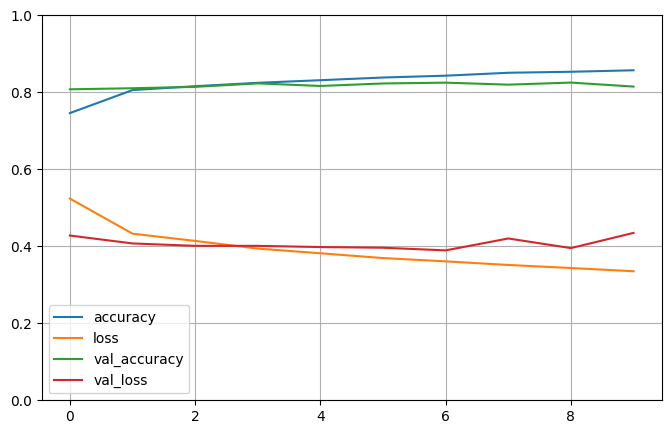

In [ ]:
# Gráfico del historial de entrenamiento
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Preguntas

1. ¿Qué hace el código en general?
######R: Con los miles de comentarios que contiene, el modelo será capaz de predecir la mayoría de veces cuando uno de estos comentarios tiene una intención positiva o una intención negativa.
2. ¿Cuál es el propósito de cada parte del código?
######R: Principalmente se separan las columnas más importantes que son los comentarios y el sentimiento (positivo o negativo), luego básicamente los demás códigos entrenan estos comentarios según su sentimiento para que al final con las creaciones de los modelos sea posible la predicción de futuros comentarios.
3. ¿Por qué se utilizan los parámetros específicos en cada función (por ejemplo,num_words, embedding_dim, input_length, loss, optimizer, etc.)?
######R: Num_words = Pone un máximo de palabras para mantener, basado en la frencuencia de estas en los comentarios; embedding_dim refiere a cada palabra como vector, basandose en la cantidad de letras, input_length es el tamaño que va a tommar al revisar la palabra, loss es la pérdida de la predicción del modelo y optimizer es donde ponemos que optimizador usaremos para agregar eficiencia en el modelo.
4. ¿Cuál es la diferencia entre train_sentences y test_sentences?
######R: train_sentences son las oraciones a entrenar el modelo, con las test_sentences revisaremos si el modelo califica bien las demás palabras de la base de datos.
5. ¿Qué significan vocab_size, max_length, embedding_dim y oov_tok?
######R: vocab_size es la cantidad de palabras que tendrá el modelo y que según ellas calificará las oraciones, max_length es que para el tamaño del cálculo de cada palabra, se utilizará lo larga que sea posible;embedding_dim refiere a cada palabra como vector, basandose en la cantidad de letras, input_length es el tamaño que va a tommar al revisar la palabra y; oov_tok hace que todas las palabras que no se encuentren en el diccionario, sean identificadas como nulasa.
6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?
######R: Para que el modelo sea lo más preciso posible.
7. ¿Qué representan las métricas de pérdida y precisión en el modelo?
######R: Muestra que tanto el modelo falla por cada predicción.
8. ¿Qué pasa durante el entrenamiento del modelo?
######R: Toma, en este caso, varias oraciones del modelo con los datos necesarios y los pone, o en entrenamiento, o en prueba.
9. ¿Qué signican las épocas y cómo afectan al proceso de entrenamiento?
######R: Las épocas son las cantidades de veces que se quiere que se ejecute todo el modelo, haciendo que cada ejecución sea un aprendizaje para el modelo y que cada vez sea mejor su prediccióm.
10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?
######R: Para ver si el modelo trabaja correctamente.
11. ¿Cuál es el objetivo final del código?
######R: Hacer un programa que sepa si un comentario de una película es buno o malo.